In [152]:
import pandas as pd
import json

#Reading the dataset which is the form of json and storing it in .csv file.
with open('C:\\Users\\vinut\\Desktop\\DataMining Project\\Software_5.json') as f:
    data = [json.loads(line) for line in f]
df = pd.DataFrame(data)
df.to_csv('output.csv', index=False)

In [153]:

df = pd.read_csv('output.csv')
df_sorted = df.sort_values(by='asin')
asin_counts = df_sorted['asin'].value_counts()
unique = asin_counts.index.tolist()
count = asin_counts.values.tolist()
unique_asin_data = pd.DataFrame({'asin': unique, 'count': count})
print("Unique values and their counts:")
print(unique_asin_data)
sum_hundred = asin_counts.head(100).sum()
print("Sum of the first 100 counts:", sum_hundred)



Unique values and their counts:
           asin  count
0    B0000AZJY6    452
1    B000EORV8Q    232
2    B0001FS9NE    230
3    B000050ZRE    230
4    B00EZPXYP4     98
..          ...    ...
797  B0011SFXCK      1
798  B00149YSUY      1
799  B0012KW3KM      1
800  B00132DENO      1
801  B0015CA9VW      1

[802 rows x 2 columns]
Sum of the first 100 counts: 4938


In [154]:
import pandas as pd
df = pd.read_csv('output.csv')

# Filter data for 'B0000AZJY6'
filtered_data = df[df['asin'] == 'B0000AZJY6']

# Save filtered data to a new file
filtered_data.to_csv('B0000AZJY6_data.csv', index=False)


In [155]:
df1 = pd.read_csv('C:\\Users\\vinut\\Desktop\\DataMining Project\\B0000AZJY6_data.csv')
df1.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"01 21, 2004",A26ILRNWFWKTEB,B0000AZJY6,{'Color:': ' 0.1389791647'},J Ken Kuzenski,This is a PCI card to add USB to an older comp...,Couldn't be better!,1074643200,2.0,NaN
1,5.0,True,"09 26, 2003",AFFTVSSV0D5A1,B0000AZJY6,{'Color:': ' 0.6378551555'},D,I am very satisfied with the purchase of this ...,"Good product, which is very easy to setup and use",1064534400,4.0,NaN
2,5.0,False,"11 8, 2002",A3TLPNECI4DG3N,B0000AZJY6,{'Color:': ' 0.4507586941'},Carl Fongheiser,Need to network computers on different floors?...,"Easy to set up, works like a dream!",1036713600,13.0,NaN
3,5.0,False,"05 25, 2002",A1MJWOYNJSZPPJ,B0000AZJY6,{'Color:': ' 0.9484064222'},James,You can't go wrong with this device. It's the...,Solid performer,1022284800,NaN,NaN
4,1.0,True,"05 17, 2018",A2RV54OXBGRD2Z,B0000AZJY6,{'Color:': ' Black-White'},minwei chen,The review that has 5 stars\nI really wonder t...,... doesn't stay connected the whole time I wo...,1526515200,6.0,NaN


In [156]:
print(df1.columns)

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')


In [157]:
#Preprocessing steps
columns_to_remove = ['image', 'style']
df1 = df1.drop(columns=columns_to_remove)
df1.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote
0,5.0,True,"01 21, 2004",A26ILRNWFWKTEB,B0000AZJY6,J Ken Kuzenski,This is a PCI card to add USB to an older comp...,Couldn't be better!,1074643200,2.0
1,5.0,True,"09 26, 2003",AFFTVSSV0D5A1,B0000AZJY6,D,I am very satisfied with the purchase of this ...,"Good product, which is very easy to setup and use",1064534400,4.0
2,5.0,False,"11 8, 2002",A3TLPNECI4DG3N,B0000AZJY6,Carl Fongheiser,Need to network computers on different floors?...,"Easy to set up, works like a dream!",1036713600,13.0
3,5.0,False,"05 25, 2002",A1MJWOYNJSZPPJ,B0000AZJY6,James,You can't go wrong with this device. It's the...,Solid performer,1022284800,NaN
4,1.0,True,"05 17, 2018",A2RV54OXBGRD2Z,B0000AZJY6,minwei chen,The review that has 5 stars\nI really wonder t...,... doesn't stay connected the whole time I wo...,1526515200,6.0


In [158]:
null = df1.isnull().sum() #Handling Null values
print(null)

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
reviewerName        0
reviewText          0
summary             2
unixReviewTime      0
vote              350
dtype: int64


In [159]:
df1['summary'].fillna('No summary', inplace=True)
df1['vote'].fillna(0, inplace=True)
null2 = df1.isnull().sum()
print(null2)

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
vote              0
dtype: int64


In [160]:
count = df1['verified'].value_counts()
print(count)

verified
True     344
False    108
Name: count, dtype: int64


In [161]:
df1

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote
0,5.0,True,"01 21, 2004",A26ILRNWFWKTEB,B0000AZJY6,J Ken Kuzenski,This is a PCI card to add USB to an older comp...,Couldn't be better!,1074643200,2.0
1,5.0,True,"09 26, 2003",AFFTVSSV0D5A1,B0000AZJY6,D,I am very satisfied with the purchase of this ...,"Good product, which is very easy to setup and use",1064534400,4.0
2,5.0,False,"11 8, 2002",A3TLPNECI4DG3N,B0000AZJY6,Carl Fongheiser,Need to network computers on different floors?...,"Easy to set up, works like a dream!",1036713600,13.0
3,5.0,False,"05 25, 2002",A1MJWOYNJSZPPJ,B0000AZJY6,James,You can't go wrong with this device. It's the...,Solid performer,1022284800,0.0
4,1.0,True,"05 17, 2018",A2RV54OXBGRD2Z,B0000AZJY6,minwei chen,The review that has 5 stars\nI really wonder t...,... doesn't stay connected the whole time I wo...,1526515200,6.0
...,...,...,...,...,...,...,...,...,...,...
447,5.0,False,"12 28, 2004",A3UFWZLQ1RV8HJ,B0000AZJY6,George Byron,I have owned this router for about 1 month. Wh...,"Router, that will help you!",1104192000,0.0
448,5.0,False,"11 3, 2004",A2Z9H86XRXBVEI,B0000AZJY6,FERNANDO CASSIA,"I am a computer geek. I have a lot of devices,...","Expensive, but worth it! painless and powerful",1099440000,2.0
449,5.0,False,"04 14, 2004",A3UZ2RCTUN4S9Z,B0000AZJY6,L. M. Sharp,"Finally, a sub $100.00 8 port switch/router/VP...",About time...,1081900800,30.0
450,5.0,True,"03 2, 2004",A3BXPR54JNE5WT,B0000AZJY6,BW,I am running a Intel Celeron 1.0 Ghz custom bu...,Great USB 2.0 Card...,1078185600,14.0


In [162]:
columns_to_remove = ['unixReviewTime', 'reviewTime','reviewerName','verified','vote'] #Removing the unecessary columns / features
df1 = df1.drop(columns=columns_to_remove)
df1.head(5)

,overall,reviewerID,asin,reviewText,summary
0,5.0,A26ILRNWFWKTEB,B0000AZJY6,This is a PCI card to add USB to an older comp...,Couldn't be better!
1,5.0,AFFTVSSV0D5A1,B0000AZJY6,I am very satisfied with the purchase of this ...,"Good product, which is very easy to setup and use"
2,5.0,A3TLPNECI4DG3N,B0000AZJY6,Need to network computers on different floors?...,"Easy to set up, works like a dream!"
3,5.0,A1MJWOYNJSZPPJ,B0000AZJY6,You can't go wrong with this device. It's the...,Solid performer
4,1.0,A2RV54OXBGRD2Z,B0000AZJY6,The review that has 5 stars\nI really wonder t...,... doesn't stay connected the whole time I wo...


In [163]:
#Tokenization Steps
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [164]:
def tokenize_text(text):
    tokens = word_tokenize(str(text))  # Tokenize the text
    return tokens

In [165]:
# Tokenizing 'reviewText' column
df1['reviewText'] = df1['reviewText'].apply(tokenize_text)

# Tokenizing 'summary' column
df1['summary'] = df1['summary'].apply(tokenize_text)

print()

In [166]:
# printing reviewText 
print("Tokenized Review Text:")
for index, tokens in enumerate(df1['reviewText'].head(), start=1):
    print(f"Row {index}: {tokens}")

# Printing tokenized summary
print("\nTokenized Summary:")
for index, tokens in enumerate(df1['summary'].head(), start=1):
    print(f"Row {index}: {tokens}")


Tokenized Review Text:
Row 1: ['This', 'is', 'a', 'PCI', 'card', 'to', 'add', 'USB', 'to', 'an', 'older', 'computer', ';', '3', 'slots', 'on', 'the', 'back', 'and', 'one', 'internal', '--', 'this', 'card', 'included', 'a', 'USB', 'slot', 'in', 'a', 'drive-bay', 'cover', ',', 'which', 'you', 'can', 'install', 'if', 'you', "'ve", 'got', 'a', 'free', 'bay', 'on', 'your', 'PC', ',', 'connecting', 'it', 'to', 'the', 'internal', 'USB', 'slot', 'with', 'a', 'supplied', 'cord', '.', 'The', 'card', 'works', 'great', 'on', 'my', 'P3-800', 'at', 'work', ',', 'running', 'Windows', '2000', '.', 'Installed', 'without', 'a', 'bit', 'of', 'trouble', ',', 'and', 'works', 'perfectly', '.', 'Following', 'the', 'installation', 'directions', 'had', 'me', 'up', 'and', 'running', 'in', 'a', 'few', 'minutes', ',', 'and', 'the', 'PC', 'recognized', 'the', 'card', 'and', 'loaded', 'the', 'drivers', '(', 'which', 'I', "'d", 'put', 'on', 'from', 'the', 'install', 'CD', ')', 'immediately', 'without', 'a', 'single'

In [167]:

df1['reviewText'] = df1['reviewText'].apply(lambda tokens: [token.lower() for token in tokens])

df1['summary'] = df1['summary'].apply(lambda tokens: [token.lower() for token in tokens])

In [168]:
#Converting to Lowercase

print("Lowercase Tokens for Review Text:")
for index, tokens in enumerate(df1['reviewText'].head(), start=1):
    print(f"Row {index}: {tokens}")

print("\nLowercase Tokens for Summary:")
for index, tokens in enumerate(df1['summary'].head(), start=1):
    print(f"Row {index}: {tokens}")


Lowercase Tokens for Review Text:
Row 1: ['this', 'is', 'a', 'pci', 'card', 'to', 'add', 'usb', 'to', 'an', 'older', 'computer', ';', '3', 'slots', 'on', 'the', 'back', 'and', 'one', 'internal', '--', 'this', 'card', 'included', 'a', 'usb', 'slot', 'in', 'a', 'drive-bay', 'cover', ',', 'which', 'you', 'can', 'install', 'if', 'you', "'ve", 'got', 'a', 'free', 'bay', 'on', 'your', 'pc', ',', 'connecting', 'it', 'to', 'the', 'internal', 'usb', 'slot', 'with', 'a', 'supplied', 'cord', '.', 'the', 'card', 'works', 'great', 'on', 'my', 'p3-800', 'at', 'work', ',', 'running', 'windows', '2000', '.', 'installed', 'without', 'a', 'bit', 'of', 'trouble', ',', 'and', 'works', 'perfectly', '.', 'following', 'the', 'installation', 'directions', 'had', 'me', 'up', 'and', 'running', 'in', 'a', 'few', 'minutes', ',', 'and', 'the', 'pc', 'recognized', 'the', 'card', 'and', 'loaded', 'the', 'drivers', '(', 'which', 'i', "'d", 'put', 'on', 'from', 'the', 'install', 'cd', ')', 'immediately', 'without', 'a

In [169]:
import re

# removing special characters and spaces from tokens
def remove_special_characters(tokens):
    pattern = r'[^a-zA-Z0-9]'  
    tokens_no_special = [re.sub(pattern, '', token) for token in tokens]
    tokens_no_special = [token for token in tokens_no_special if token]  
    return tokens_no_special
df1['reviewText'] = df1['reviewText'].apply(remove_special_characters)
df1['summary'] = df1['summary'].apply(remove_special_characters)


In [170]:
# Print tokens with special characters removed for 'reviewText_tokens_clean' column
print("Tokens with Special Characters Removed for Review Text:")
for index, tokens in enumerate(df1['reviewText'].head(), start=1):
    print(f"Row {index}: {tokens}")

# Print tokens with special characters removed for 'summary_tokens_clean' column
print("\nTokens with Special Characters Removed for Summary:")
for index, tokens in enumerate(df1['summary'].head(), start=1):
    print(f"Row {index}: {tokens}")


Tokens with Special Characters Removed for Review Text:
Row 1: ['this', 'is', 'a', 'pci', 'card', 'to', 'add', 'usb', 'to', 'an', 'older', 'computer', '3', 'slots', 'on', 'the', 'back', 'and', 'one', 'internal', 'this', 'card', 'included', 'a', 'usb', 'slot', 'in', 'a', 'drivebay', 'cover', 'which', 'you', 'can', 'install', 'if', 'you', 've', 'got', 'a', 'free', 'bay', 'on', 'your', 'pc', 'connecting', 'it', 'to', 'the', 'internal', 'usb', 'slot', 'with', 'a', 'supplied', 'cord', 'the', 'card', 'works', 'great', 'on', 'my', 'p3800', 'at', 'work', 'running', 'windows', '2000', 'installed', 'without', 'a', 'bit', 'of', 'trouble', 'and', 'works', 'perfectly', 'following', 'the', 'installation', 'directions', 'had', 'me', 'up', 'and', 'running', 'in', 'a', 'few', 'minutes', 'and', 'the', 'pc', 'recognized', 'the', 'card', 'and', 'loaded', 'the', 'drivers', 'which', 'i', 'd', 'put', 'on', 'from', 'the', 'install', 'cd', 'immediately', 'without', 'a', 'single', 'hitch', 'good', 'as', 'it', '

In [171]:
# removing stopwords from tokens
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    tokens_no_stop = [token for token in tokens if token not in stop_words]
    return tokens_no_stop
df1['reviewText'] = df1['reviewText'].apply(remove_stopwords)
df1['summary'] = df1['summary'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [172]:
# Print tokens without stopwords for 'reviewText_tokens_no_stop' column
print("Tokens without Stopwords for Review Text:")
for index, tokens in enumerate(df1['reviewText'].head(), start=1):
    print(f"Row {index}: {tokens}")

# Print tokens without stopwords for 'summary_tokens_no_stop' column
print("\nTokens without Stopwords for Summary:")
for index, tokens in enumerate(df1['summary'].head(), start=1):
    print(f"Row {index}: {tokens}")


Tokens without Stopwords for Review Text:
Row 1: ['pci', 'card', 'add', 'usb', 'older', 'computer', '3', 'slots', 'back', 'one', 'internal', 'card', 'included', 'usb', 'slot', 'drivebay', 'cover', 'install', 'got', 'free', 'bay', 'pc', 'connecting', 'internal', 'usb', 'slot', 'supplied', 'cord', 'card', 'works', 'great', 'p3800', 'work', 'running', 'windows', '2000', 'installed', 'without', 'bit', 'trouble', 'works', 'perfectly', 'following', 'installation', 'directions', 'running', 'minutes', 'pc', 'recognized', 'card', 'loaded', 'drivers', 'put', 'install', 'cd', 'immediately', 'without', 'single', 'hitch', 'good', 'gets']
Row 2: ['satisfied', 'purchase', 'wireless', 'router', 'setup', 'took', 'minutes', 'complete', 'setup', 'wizard', 'everything', 'worked', 'first', 'time', 'perfectly', 'wireless', 'connectivity', 'throughout', 'whole', 'house', 'connection', 'stable', 'speed', 'advertised', 'considered', 'linksys', 'netgear', 'routers', 'always', 'kind', 'problem', 'found', 'compla

In [173]:
df1

,overall,reviewerID,asin,reviewText,summary
0,5.0,A26ILRNWFWKTEB,B0000AZJY6,"[pci, card, add, usb, older, computer, 3, slot...","[could, nt, better]"
1,5.0,AFFTVSSV0D5A1,B0000AZJY6,"[satisfied, purchase, wireless, router, setup,...","[good, product, easy, setup, use]"
2,5.0,A3TLPNECI4DG3N,B0000AZJY6,"[need, network, computers, different, floors, ...","[easy, set, works, like, dream]"
3,5.0,A1MJWOYNJSZPPJ,B0000AZJY6,"[ca, nt, go, wrong, device, hub, operates, sol...","[solid, performer]"
4,1.0,A2RV54OXBGRD2Z,B0000AZJY6,"[review, 5, stars, really, wonder, real, nt, s...","[nt, stay, connected, whole, time, would, reco..."
...,...,...,...,...,...
447,5.0,A3UFWZLQ1RV8HJ,B0000AZJY6,"[owned, router, 1, month, got, though, standar...","[router, help]"
448,5.0,A2Z9H86XRXBVEI,B0000AZJY6,"[computer, geek, lot, devices, many, ethernet,...","[expensive, worth, painless, powerful]"
449,5.0,A3UZ2RCTUN4S9Z,B0000AZJY6,"[finally, sub, 10000, 8, port, switchroutervpn...",[time]
450,5.0,A3BXPR54JNE5WT,B0000AZJY6,"[running, intel, celeron, 10, ghz, custom, bui...","[great, usb, 20, card]"


In [174]:
# Function to get sentiment polarity
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity
df1['sentiment'] = df1['reviewText'].apply(get_sentiment)
print(df1[['reviewText', 'sentiment']].head(10))


                                          reviewText  sentiment
0  [pci, card, add, usb, older, computer, 3, slot...   0.179524
1  [satisfied, purchase, wireless, router, setup,...   0.385417
2  [need, network, computers, different, floors, ...   0.095238
3  [ca, nt, go, wrong, device, hub, operates, sol...  -0.033333
4  [review, 5, stars, really, wonder, real, nt, s...   0.200000
5  [perfect, device, thing, would, make, better, ...   0.500000
6  [reviews, product, listed, amazon, needs, stra...  -0.175000
7  [far, impressed, arrive, quickly, work, us, fo...   0.138333
8  [looked, purchasing, router, however, one, won...   0.000000
9  [thought, inexpensive, got, great, boys, compu...   0.350000


In [175]:
# Function to convert sentiment scores to categorical values
def get_sentiment_category(score):
    if score >= 0.3:  
        return 1  # Positive sentiment
    elif score < -0.1:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment or no strong sentiment
df1['sentiment_category'] = df1['sentiment'].apply(get_sentiment_category)
df1.head(50)

,overall,reviewerID,asin,reviewText,summary,sentiment,sentiment_category
0,5.0,A26ILRNWFWKTEB,B0000AZJY6,"[pci, card, add, usb, older, computer, 3, slot...","[could, nt, better]",0.179524,0
1,5.0,AFFTVSSV0D5A1,B0000AZJY6,"[satisfied, purchase, wireless, router, setup,...","[good, product, easy, setup, use]",0.385417,1
2,5.0,A3TLPNECI4DG3N,B0000AZJY6,"[need, network, computers, different, floors, ...","[easy, set, works, like, dream]",0.095238,0
3,5.0,A1MJWOYNJSZPPJ,B0000AZJY6,"[ca, nt, go, wrong, device, hub, operates, sol...","[solid, performer]",-0.033333,0
4,1.0,A2RV54OXBGRD2Z,B0000AZJY6,"[review, 5, stars, really, wonder, real, nt, s...","[nt, stay, connected, whole, time, would, reco...",0.200000,0
5,5.0,A3PWOYJPO4CT93,B0000AZJY6,"[perfect, device, thing, would, make, better, ...","[perfect, device, thing, would, make]",0.500000,1
6,1.0,A2HL609RR13WNZ,B0000AZJY6,"[reviews, product, listed, amazon, needs, stra...","[nt, make, sense]",-0.175000,-1
7,1.0,A14HDK1OLFYMVM,B0000AZJY6,"[far, impressed, arrive, quickly, work, us, fo...","[work, feel]",0.138333,0
8,1.0,A3P2DW4YDYK88C,B0000AZJY6,"[looked, purchasing, router, however, one, won...","[looked, purchasing, router, however, one]",0.000000,0
9,5.0,A2N4Y0OQ8RP88Y,B0000AZJY6,"[thought, inexpensive, got, great, boys, compu...","[great, boys, computer, center]",0.350000,1


In [176]:
df1['sentiment_category'].value_counts()

sentiment_category
 0    220
 1    214
-1     18
Name: count, dtype: int64

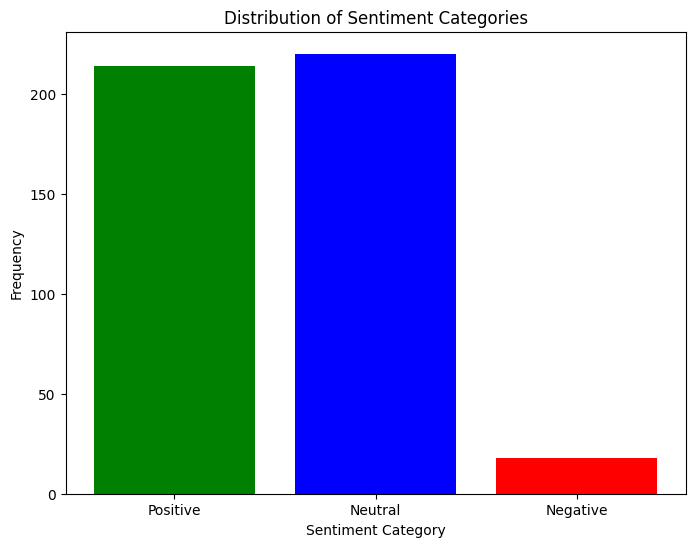

In [177]:
import matplotlib.pyplot as plt
sentiment_categories = [214, 220, 18]
categories = ['Positive', 'Neutral', 'Negative']

#bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, sentiment_categories, color=['green', 'blue', 'red'])
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Categories')
plt.show()


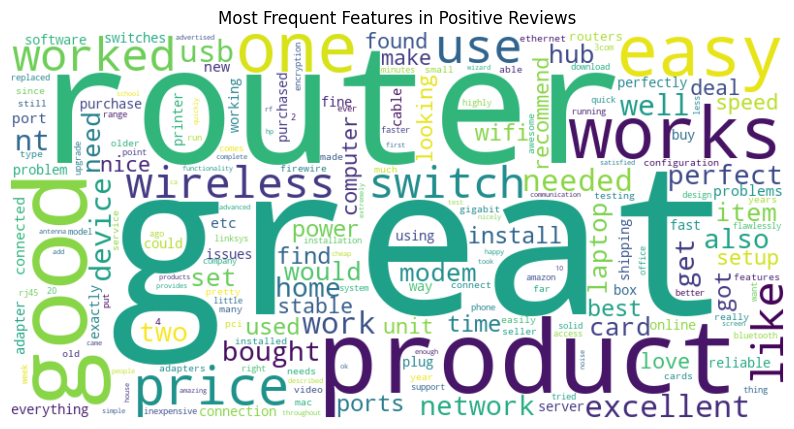

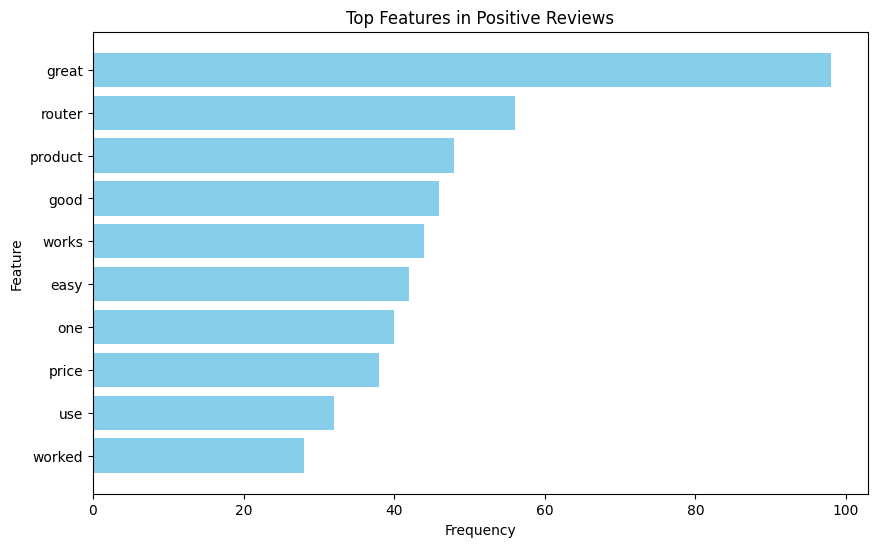

In [178]:
from nltk import pos_tag, word_tokenize
from collections import Counter
from wordcloud import WordCloud

positive_reviews = df1[df1['sentiment_category'] == 1]['reviewText']
feature_words = [word for review in positive_reviews for word in review]
feature_word_freq = Counter(feature_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(feature_word_freq)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Features in Positive Reviews')
plt.show()

top_features = feature_word_freq.most_common(10)  # Top 10 features
feature_names, frequencies = zip(*top_features)

plt.figure(figsize=(10, 6))
plt.barh(feature_names, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Feature')
plt.title('Top Features in Positive Reviews')
plt.gca().invert_yaxis()
plt.show()


In [179]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity
df1['sentiment2'] = df1['summary'].apply(get_sentiment)
print(df1[['summary', 'sentiment2']].head(10))

                                             summary  sentiment2
0                                [could, nt, better]    0.500000
1                  [good, product, easy, setup, use]    0.566667
2                    [easy, set, works, like, dream]    0.433333
3                                 [solid, performer]    0.000000
4  [nt, stay, connected, whole, time, would, reco...    0.200000
5              [perfect, device, thing, would, make]    1.000000
6                                  [nt, make, sense]    0.000000
7                                       [work, feel]    0.000000
8         [looked, purchasing, router, however, one]    0.000000
9                    [great, boys, computer, center]    0.350000


In [180]:
def get_sentiment_category(score):
    if score > 0.5: 
        return 1  # Positive sentiment
    elif score < -0.1:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment or no strong sentiment

df1['sentiment2_category'] = df1['sentiment2'].apply(get_sentiment_category)
print(df1[['summary', 'sentiment2_category']].head(10))

                                             summary  sentiment2_category
0                                [could, nt, better]                    0
1                  [good, product, easy, setup, use]                    1
2                    [easy, set, works, like, dream]                    0
3                                 [solid, performer]                    0
4  [nt, stay, connected, whole, time, would, reco...                    0
5              [perfect, device, thing, would, make]                    1
6                                  [nt, make, sense]                    0
7                                       [work, feel]                    0
8         [looked, purchasing, router, however, one]                    0
9                    [great, boys, computer, center]                    0


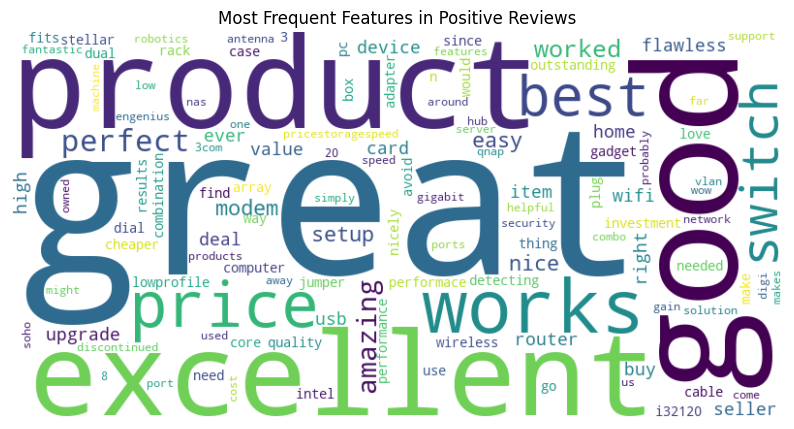

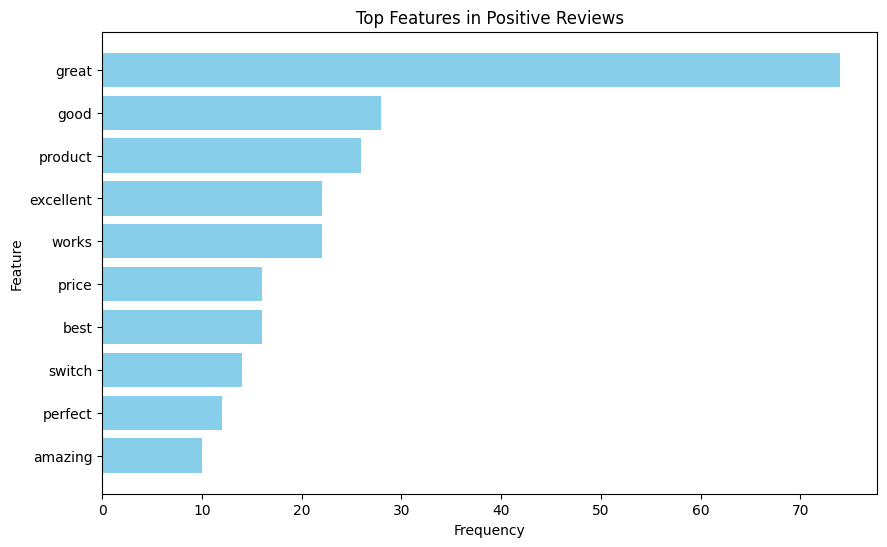

In [181]:
from nltk import pos_tag, word_tokenize
from collections import Counter
from wordcloud import WordCloud
positive_reviews = df1[df1['sentiment2_category'] == 1]['summary']
feature_words = [word for review in positive_reviews for word in review]
feature_word_freq = Counter(feature_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(feature_word_freq)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Features in Positive Reviews')
plt.show()

top_features = feature_word_freq.most_common(10)  # Top 10 features
feature_names, frequencies = zip(*top_features)

plt.figure(figsize=(10, 6))
plt.barh(feature_names, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Feature')
plt.title('Top Features in Positive Reviews')
plt.gca().invert_yaxis()
plt.show()

In [182]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vinut\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [183]:
#Aspect based sentiment analysis
from nltk import pos_tag
tagged_feature = pos_tag(feature_words)
aspect_keyword = [word for word, pos in tagged_feature if pos in ['NN', 'NNS', 'JJ']]
print(aspect_keyword)

['good', 'product', 'easy', 'setup', 'use', 'perfect', 'device', 'thing', 'good', 'computer', 'dual', 'core', 'i32120', 'excellent', 'value', 'high', 'quality', 'great', 'seller', 'stellar', 'excellent', 'love', 'nice', 'rack', 'good', 'excellent', 'nice', 'buy', 'great', 'price', 'way', 'seller', 'great', 'jumper', 'cable', 'excellent', 'product', 'dial', 'modem', 'upgrade', 'works', 'great', 'good', 'deal', 'great', 'fits', 'lowprofile', 'pc', 'good', 'item', 'good', 'deal', 'flawless', 'easy', 'setup', 'perfect', 'performance', 'switch', 'good', 'product', 'great', 'price', 'great', 'gadget', 'wifi', 'avoid', 'wifi', 'case', 'good', 'investment', 'nice', 'outstanding', 'wireless', 'good', 'price', 'perfect', 'worked', 'great', 'right', 'box', 'perfect', 'great', 'results', 'great', 'excellent', 'good', 'product', 'excellent', 'value', 'great', 'upgrade', 'great', 'array', 'price', 'easy', 'plug', 'great', 'performace', 'great', 'great', 'product', 'great', 'amazing', 'product', 'gre

In [184]:
df_aspect = pd.read_csv('C:\\Users\\vinut\\Desktop\\DataMining Project\\B0000AZJY6_data.csv')

df_aspect.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"01 21, 2004",A26ILRNWFWKTEB,B0000AZJY6,{'Color:': ' 0.1389791647'},J Ken Kuzenski,This is a PCI card to add USB to an older comp...,Couldn't be better!,1074643200,2.0,NaN
1,5.0,True,"09 26, 2003",AFFTVSSV0D5A1,B0000AZJY6,{'Color:': ' 0.6378551555'},D,I am very satisfied with the purchase of this ...,"Good product, which is very easy to setup and use",1064534400,4.0,NaN
2,5.0,False,"11 8, 2002",A3TLPNECI4DG3N,B0000AZJY6,{'Color:': ' 0.4507586941'},Carl Fongheiser,Need to network computers on different floors?...,"Easy to set up, works like a dream!",1036713600,13.0,NaN
3,5.0,False,"05 25, 2002",A1MJWOYNJSZPPJ,B0000AZJY6,{'Color:': ' 0.9484064222'},James,You can't go wrong with this device. It's the...,Solid performer,1022284800,NaN,NaN
4,1.0,True,"05 17, 2018",A2RV54OXBGRD2Z,B0000AZJY6,{'Color:': ' Black-White'},minwei chen,The review that has 5 stars\nI really wonder t...,... doesn't stay connected the whole time I wo...,1526515200,6.0,NaN


In [185]:
import spacy
nlp = spacy.load("en_core_web_sm")
def extract_aspects(text):
    doc = nlp(text)
    aspects = []
    for token in doc:
        if token.pos_ == "NOUN":    #extracts noun
            aspects.append(token.text)
    return aspects


review_text = "This is a PCI card to add USB to an older computer; 3 slots on the back and one internal--this card included a USB slot in a drive-bay cover, which you can install if you've got a free bay on your PC, connecting it to the internal USB slot with a supplied cord.  The card works great on my P3-800 at work, running Windows 2000.  Installed without a bit of trouble, and works perfectly.  Following the installation directions had me up and running in a few minutes, and the PC recognized the card and loaded the drivers (which I'd put on from the install CD) immediately without a single hitch.  Good as it gets!"
aspects = extract_aspects(review_text)
print("Aspects:",aspects)

Aspects: ['PCI', 'card', 'USB', 'computer', 'slots', 'back', 'card', 'USB', 'slot', 'drive', 'bay', 'cover', 'bay', 'PC', 'USB', 'slot', 'cord', 'card', 'work', 'bit', 'trouble', 'installation', 'directions', 'minutes', 'PC', 'card', 'drivers', 'hitch']


In [186]:
df_review = df_aspect['reviewText']

def extract_aspects(text):
    doc = nlp(text)
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

# applying the extract_aspects function to the 'reviewText' column
df_aspects = df_review.apply(extract_aspects)
df_review = pd.DataFrame(df_review)
df_review['aspects'] = df_aspects
df_review = df_review.rename(columns={'reviewText': 'reviews'})
print(df_review)

                                               reviews  \
0    This is a PCI card to add USB to an older comp...   
1    I am very satisfied with the purchase of this ...   
2    Need to network computers on different floors?...   
3    You can't go wrong with this device.  It's the...   
4    The review that has 5 stars\nI really wonder t...   
..                                                 ...   
447  I have owned this router for about 1 month. Wh...   
448  I am a computer geek. I have a lot of devices,...   
449  Finally, a sub $100.00 8 port switch/router/VP...   
450  I am running a Intel Celeron 1.0 Ghz custom bu...   
451  This is my first modification on any type of c...   

                                               aspects  
0    [PCI, card, USB, computer, slots, back, card, ...  
1    [purchase, router, setup, minutes, setup, wiza...  
2    [computers, floors, product, bridge, interface...  
3                                 [device, hub, power]  
4                 

In [187]:
print(df_review)

                                               reviews  \
0    This is a PCI card to add USB to an older comp...   
1    I am very satisfied with the purchase of this ...   
2    Need to network computers on different floors?...   
3    You can't go wrong with this device.  It's the...   
4    The review that has 5 stars\nI really wonder t...   
..                                                 ...   
447  I have owned this router for about 1 month. Wh...   
448  I am a computer geek. I have a lot of devices,...   
449  Finally, a sub $100.00 8 port switch/router/VP...   
450  I am running a Intel Celeron 1.0 Ghz custom bu...   
451  This is my first modification on any type of c...   

                                               aspects  
0    [PCI, card, USB, computer, slots, back, card, ...  
1    [purchase, router, setup, minutes, setup, wiza...  
2    [computers, floors, product, bridge, interface...  
3                                 [device, hub, power]  
4                 

In [188]:
from collections import Counter
all_aspects = [aspect for sublist in df_review['aspects'] for aspect in sublist]
aspect_counts = Counter(all_aspects)
top_aspects = aspect_counts.most_common(5)

# Print the top aspects and their counts
print("Top Aspects:")
for aspect, count in top_aspects:
    print(f"{aspect}: {count} mentions")


Top Aspects:
product: 128 mentions
router: 106 mentions
switch: 88 mentions
port: 84 mentions
device: 80 mentions


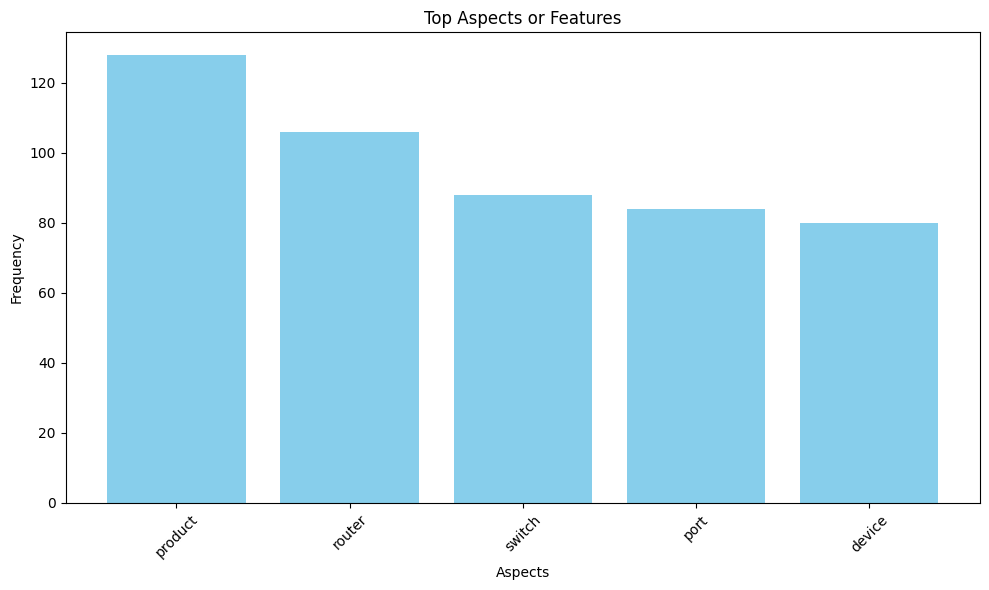

In [189]:
aspects, counts = zip(*top_aspects)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(aspects, counts, color='skyblue')
plt.xlabel('Aspects')
plt.ylabel('Frequency')
plt.title('Top Aspects or Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

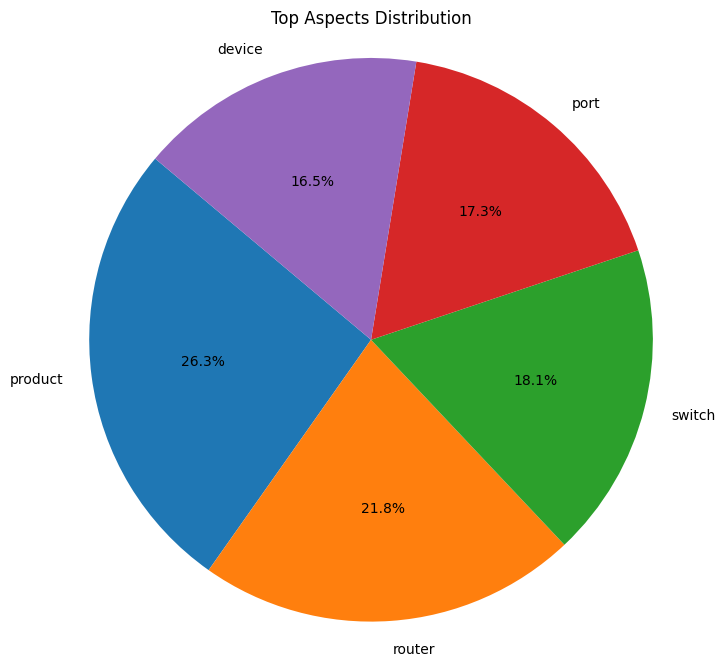

In [190]:
aspects, counts = zip(*top_aspects)

#pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=aspects, autopct='%1.1f%%', startangle=140)
plt.title('Top Aspects Distribution')
plt.axis('equal')  
plt.show()

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_review['reviews'], df1['sentiment_category'], test_size=0.2, random_state=42)
model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', random_state=42))
model.fit(X_train, y_train)   #Fit the model
predictions = model.predict(X_test) # Make predictions on the test set

#find accuracy
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, predictions))

# For new reviews,predict:
new_reviews = [
    "Very disappointed with the performance. Would not recommend.",
    "Amazing product",
    "very disappointed",
    "In this case all is excelent.",
    "Bad product",
    "Good Product, very pleased",
    "bad product"
]
new_predictions = model.predict(new_reviews)
print("\nPredicted Sentiments for New Reviews:", new_predictions)

Test Accuracy: 0.9340659340659341

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           0       0.90      0.95      0.92        38
           1       0.96      0.96      0.96        51

    accuracy                           0.93        91
   macro avg       0.62      0.64      0.63        91
weighted avg       0.91      0.93      0.92        91


Predicted Sentiments for New Reviews: [0 1 0 1 0 1 0]


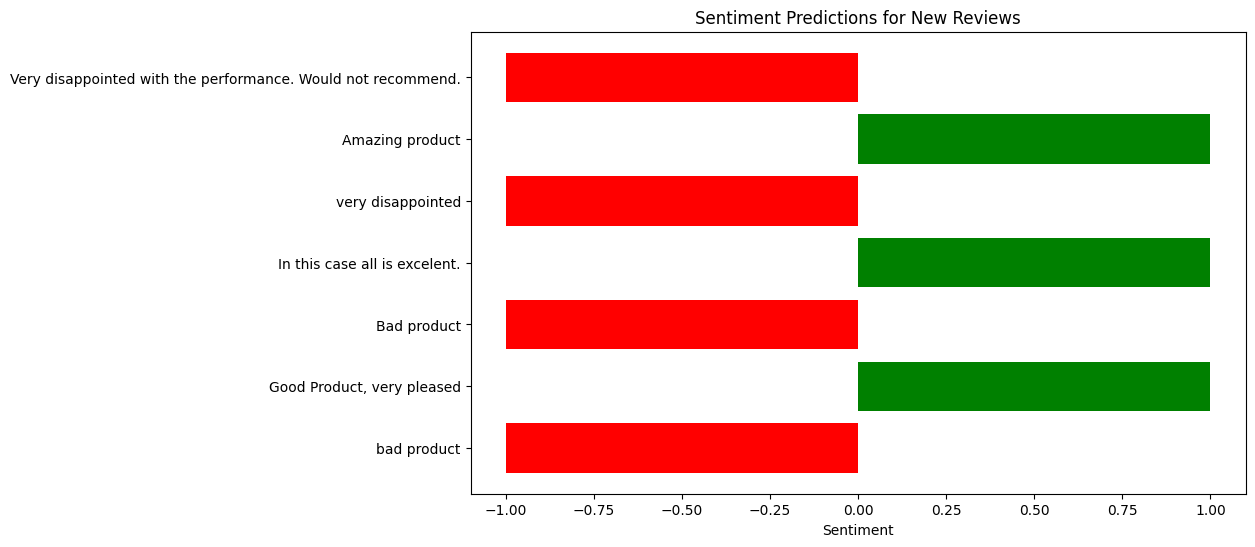

In [205]:
sentiment_mapping = {
    0: 'Negative',
    1: 'Positive'
}
predicted_sentiments = [sentiment_mapping[label] for label in new_predictions]
colors = ['red' if pred == 'Negative' else 'green' for pred in predicted_sentiments]

# Plotting sentiment predictions for new reviews
plt.figure(figsize=(10, 6))
plt.barh(range(len(new_reviews)), [1 if pred == 'Positive' else -1 for pred in predicted_sentiments], color=colors)
plt.yticks(range(len(new_reviews)), new_reviews)
plt.xlabel('Sentiment')
plt.title('Sentiment Predictions for New Reviews')
plt.gca().invert_yaxis()  # Invert y-axis to display the most recent review at the top
plt.show()

In [202]:
aspect_sentiments = {
    'product': ['excellent', 'good', 'great', 'bad', 'poor', 'disappointing'],
    'router': ['fast', 'reliable', 'slow', 'unreliable'],
    'switch': ['efficient', 'effective', 'inefficient', 'ineffective'],
    'port': ['compatible', 'incompatible', 'functional', 'non-functional'],
    'device': ['sophisticated', 'basic', 'advanced', 'outdated']
}

# perform rule-based sentiment analysis
def rule_based_sentiment_analysis(review):
    sentiment_scores = {}
    for aspect, sentiment_words in aspect_sentiments.items():
        aspect_sentiment = 'neutral'
        for word in sentiment_words:
            if isinstance(review, str) and isinstance(word, str) and word in review.lower():
                aspect_sentiment = 'positive'
                break
        sentiment_scores[aspect] = aspect_sentiment 
    return sentiment_scores

top_aspects = ['product', 'router', 'switch', 'port', 'device']

# Perform rule-based sentiment analysis for each top aspect
for aspect in top_aspects:
    reviews_with_aspect = df_review[df_review['aspects'].apply(lambda x: aspect in x)]['reviews']
    aspect_sentiments = reviews_with_aspect.apply(rule_based_sentiment_analysis)
    for idx, sentiments in aspect_sentiments.items():
        print(f"Review: {idx}")
        print("Sentiments:", sentiments)
    print()


Review: 1
Sentiments: {'product': 'neutral', 'router': 'positive', 'switch': 'neutral', 'port': 'neutral', 'device': 'neutral'}
Review: 2
Sentiments: {'product': 'neutral', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral', 'device': 'neutral'}
Review: 4
Sentiments: {'product': 'neutral', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral', 'device': 'neutral'}
Review: 6
Sentiments: {'product': 'neutral', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral', 'device': 'neutral'}
Review: 7
Sentiments: {'product': 'neutral', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral', 'device': 'neutral'}
Review: 8
Sentiments: {'product': 'neutral', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral', 'device': 'neutral'}
Review: 17
Sentiments: {'product': 'neutral', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral', 'device': 'neutral'}
Review: 57
Sentiments: {'product': 'positive', 'router': 'neutral', 'switch': 'neutral', 'port': 'neutral', '